### LAB 02  - Data Cleaning/ Preprocessing Techniques
#### - Handle Duplicates
#### - Handle Irrelevant Data
#### - Handle Missing Values
#### - Handle Outliers

In [1]:
### Import necessary libraries
import pandas as pd # Data manipulation and analysis.
import numpy as np # Numerical operations and array handling.
import matplotlib.pyplot as plt # More control, lower-level, basic plotting.
import seaborn as sns # Higher-level, more aesthetically pleasing plots.
from scipy import stats # Statistical functions and tests.

pd.set_option('display.max_columns', None) # Display all columns in DataFrame output.
pd.set_option('display.max_rows', None) # Display all rows in DataFrame output.


#### Load Data from a CSV

In [2]:
df = pd.read_csv('data/house-price-perth.csv')

In [3]:
# Display the first 5 rows of the DataFrame to understand its structure.
df.head()

,ADDRESS,SUBURB,PRICE,BEDROOMS,BATHROOMS,GARAGE,LAND_AREA,FLOOR_AREA,BUILD_YEAR,CBD_DIST,NEAREST_STN,NEAREST_STN_DIST,DATE_SOLD,POSTCODE,LATITUDE,LONGITUDE,NEAREST_SCH,NEAREST_SCH_DIST,NEAREST_SCH_RANK
0,1 Acorn Place,South Lake,565000,4,2,2.0,600,160,2003.0,18300,Cockburn Central Station,1800,09-2018\r,6164,-32.115900,115.842450,LAKELAND SENIOR HIGH SCHOOL,0.828339,NaN
1,1 Addis Way,Wandi,365000,3,2,2.0,351,139,2013.0,26900,Kwinana Station,4900,02-2019\r,6167,-32.193470,115.859554,ATWELL COLLEGE,5.524324,129.0
2,1 Ainsley Court,Camillo,287000,3,1,1.0,719,86,1979.0,22600,Challis Station,1900,06-2015\r,6111,-32.120578,115.993579,KELMSCOTT SENIOR HIGH SCHOOL,1.649178,113.0
3,1 Albert Street,Bellevue,255000,2,1,2.0,651,59,1953.0,17900,Midland Station,3600,07-2018\r,6056,-31.900547,116.038009,SWAN VIEW SENIOR HIGH SCHOOL,1.571401,NaN
4,1 Aman Place,Lockridge,325000,4,1,2.0,466,131,1998.0,11200,Bassendean Station,2000,11-2016\r,6054,-31.885790,115.947780,KIARA COLLEGE,1.514922,NaN


In [4]:
# Returns the number of rows and columns in the DataFrame.
df.shape

(33656, 19)

In [5]:
# Returns information about the DataFrame, including data types and non-null counts.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33656 entries, 0 to 33655
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ADDRESS           33656 non-null  object 
 1   SUBURB            33656 non-null  object 
 2   PRICE             33656 non-null  int64  
 3   BEDROOMS          33656 non-null  int64  
 4   BATHROOMS         33656 non-null  int64  
 5   GARAGE            31178 non-null  float64
 6   LAND_AREA         33656 non-null  int64  
 7   FLOOR_AREA        33656 non-null  int64  
 8   BUILD_YEAR        30501 non-null  float64
 9   CBD_DIST          33656 non-null  int64  
 10  NEAREST_STN       33656 non-null  object 
 11  NEAREST_STN_DIST  33656 non-null  int64  
 12  DATE_SOLD         33656 non-null  object 
 13  POSTCODE          33656 non-null  int64  
 14  LATITUDE          33656 non-null  float64
 15  LONGITUDE         33656 non-null  float64
 16  NEAREST_SCH       33656 non-null  object

In [6]:
# Returns summary statistics for numerical columns in the DataFrame.
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
PRICE,33656.0,637072.005794,355825.632737,51000.000000,410000.000000,535500.000000,760000.000000,2.440000e+06
BEDROOMS,33656.0,3.659110,0.752038,1.000000,3.000000,4.000000,4.000000,1.000000e+01
BATHROOMS,33656.0,1.823063,0.587427,1.000000,1.000000,2.000000,2.000000,1.600000e+01
GARAGE,31178.0,2.199917,1.365225,1.000000,2.000000,2.000000,2.000000,9.900000e+01
LAND_AREA,33656.0,2740.644016,16693.513215,61.000000,503.000000,682.000000,838.000000,9.999990e+05
FLOOR_AREA,33656.0,183.501545,72.102982,1.000000,130.000000,172.000000,222.250000,8.700000e+02
BUILD_YEAR,30501.0,1989.706436,20.964330,1868.000000,1978.000000,1995.000000,2005.000000,2.017000e+03
CBD_DIST,33656.0,19777.374465,11364.415413,681.000000,11200.000000,17500.000000,26600.000000,5.980000e+04
NEAREST_STN_DIST,33656.0,4523.371494,4495.064024,46.000000,1800.000000,3200.000000,5300.000000,3.550000e+04
POSTCODE,33656.0,6089.420074,62.167921,6003.000000,6050.000000,6069.000000,6150.000000,6.558000e+03


### 1. Handle Duplicates

In [7]:
df.columns

Index(['ADDRESS', 'SUBURB', 'PRICE', 'BEDROOMS', 'BATHROOMS', 'GARAGE',
       'LAND_AREA', 'FLOOR_AREA', 'BUILD_YEAR', 'CBD_DIST', 'NEAREST_STN',
       'NEAREST_STN_DIST', 'DATE_SOLD', 'POSTCODE', 'LATITUDE', 'LONGITUDE',
       'NEAREST_SCH', 'NEAREST_SCH_DIST', 'NEAREST_SCH_RANK'],
      dtype='object')

In [8]:
# Check for duplicates in each column and print the count of duplicates for each column.
for col in df.columns:
    duplicated_count = df[col].duplicated().sum()
    print(f"Column: {col}")
    print(f"Duplicate Count: {duplicated_count}")
    print("*" * 50)

Column: ADDRESS
Duplicate Count: 90
**************************************************
Column: SUBURB
Duplicate Count: 33335
**************************************************
Column: PRICE
Duplicate Count: 31359
**************************************************
Column: BEDROOMS
Duplicate Count: 33646
**************************************************
Column: BATHROOMS
Duplicate Count: 33648
**************************************************
Column: GARAGE
Duplicate Count: 33630
**************************************************
Column: LAND_AREA
Duplicate Count: 29284
**************************************************
Column: FLOOR_AREA
Duplicate Count: 33128
**************************************************
Column: BUILD_YEAR
Duplicate Count: 33531
**************************************************
Column: CBD_DIST
Duplicate Count: 33061
**************************************************
Column: NEAREST_STN
Duplicate Count: 33588
**************************************************
C

In [9]:
# Duplicate records by multiple columns
duplicate_multi_cols = df[df.duplicated(
    subset=['ADDRESS', 'FLOOR_AREA'], 
    keep=False
    )]
duplicate_multi_cols.shape

(9, 19)

In [10]:
duplicate_multi_cols.sort_values('ADDRESS').head(10)

,ADDRESS,SUBURB,PRICE,BEDROOMS,BATHROOMS,GARAGE,LAND_AREA,FLOOR_AREA,BUILD_YEAR,CBD_DIST,NEAREST_STN,NEAREST_STN_DIST,DATE_SOLD,POSTCODE,LATITUDE,LONGITUDE,NEAREST_SCH,NEAREST_SCH_DIST,NEAREST_SCH_RANK
4149,123 Fairway,Crawley,818000,4,1,NaN,160,150,NaN,5500,Daglish Station,3700,02-2018\r,6009,-31.985151,115.815463,SHENTON COLLEGE,3.065177,14.0
4150,123 Fairway,Crawley,818000,4,1,NaN,160,150,NaN,5500,Daglish Station,3700,02-2018\r,6009,-31.985152,115.815314,SHENTON COLLEGE,3.059929,14.0
4151,123 Fairway,Crawley,818000,4,1,NaN,160,150,NaN,5500,Daglish Station,3700,02-2018\r,6009,-31.985133,115.815176,SHENTON COLLEGE,3.053099,14.0
8303,17 Russell Road,Madeley,427000,3,2,2.0,618,136,2005.0,16300,Greenwood Station,4200,06-2020\r,6065,-31.808107,115.826540,KINGSWAY CHRISTIAN COLLEGE,1.096691,50.0
8304,17 Russell Road,Maida Vale,440000,4,2,2.0,606,136,2000.0,14700,Midland Station,6600,03-2017\r,6057,-31.950040,116.014860,DARLING RANGE SPORTS COLLEGE,2.874672,137.0
18083,32 Avon Crescent,Atwell,625000,4,2,2.0,790,237,2004.0,21500,Cockburn Central Station,2200,07-2019\r,6164,-32.145070,115.861700,ATWELL COLLEGE,0.261550,129.0
18084,32 Avon Crescent,Viveash,805000,4,2,2.0,966,237,1994.0,15500,Midland Station,1400,05-2010\r,6056,-31.879210,115.999130,LA SALLE COLLEGE,0.503862,53.0
20655,4 Carmel Road,Carmel,955000,4,3,3.0,15761,221,2009.0,21700,Madding,9300,09-2013\r,6076,-32.019395,116.074759,CARMEL ADVENTIST COLLEGE,1.890651,NaN
20656,4 Carmel Road,Carmel,955000,4,3,3.0,15761,221,2009.0,21700,Madding,9300,09-2013\r,6076,-32.019657,116.096652,CARMEL ADVENTIST COLLEGE,0.600853,NaN


In [11]:
# Remove duplicate rows from the DataFrame considering all columns.
remove_duplicates_all_cols  = df.drop_duplicates()

# Remove duplicates based on 'University' and 'Year' columns.
remove_duplicate_multi_cols = df.drop_duplicates(
    subset=['ADDRESS', 'FLOOR_AREA'], 
    keep='first')  
remove_duplicate_multi_cols.shape

(33651, 19)

In [12]:
# Shape should be (0,30) if all duplicates are removed by the specified columns.
df_temp = remove_duplicate_multi_cols[remove_duplicate_multi_cols.duplicated(
    subset=['ADDRESS', 'FLOOR_AREA'], 
    keep=False
    )]
df_temp.shape

(0, 19)

### 2. Handle Irrelavant Data

In [13]:
# Columns where all values are the same (constant features).
constant_features = [col for col in df.columns if df[col].nunique() == 1]
print("Constant features:", constant_features)

Constant features: []


In [14]:
# Remove constant features from the DataFrame.
df_no_consntant_features = df.drop(columns=constant_features)

In [15]:
# Columns with mostly missing values (e.g., more than x% missing)
threshold = 5
print(f"Total records {df.shape[0]}")
print("*"* 50)
for col in df.columns:
    missing_count = df[col].isnull().sum()
    missing_ratio = (missing_count / df.shape[0]) * 100
    if missing_ratio > threshold:
        print(f"Column: {col} has {missing_count} missing values ({missing_ratio:.2f}%)")
        print("*" * 50)

Total records 33656
**************************************************
Column: GARAGE has 2478 missing values (7.36%)
**************************************************
Column: BUILD_YEAR has 3155 missing values (9.37%)
**************************************************
Column: NEAREST_SCH_RANK has 10952 missing values (32.54%)
**************************************************


In [16]:
# Remove columns with more than x% missing values.
columns_to_drop = [col for col in df.columns if (df[col].isnull().sum() / df.shape[0]) * 100 > threshold]
df_low_missing_data = df.drop(columns=columns_to_drop)

### 3. Handle Missing Values

In [17]:
# Display the DataFrame having missing data.
df_missing_data = df[df.isnull().any(axis=1)]
df_missing_data.shape

(14448, 19)

In [18]:
df_missing_data.tail()

,ADDRESS,SUBURB,PRICE,BEDROOMS,BATHROOMS,GARAGE,LAND_AREA,FLOOR_AREA,BUILD_YEAR,CBD_DIST,NEAREST_STN,NEAREST_STN_DIST,DATE_SOLD,POSTCODE,LATITUDE,LONGITUDE,NEAREST_SCH,NEAREST_SCH_DIST,NEAREST_SCH_RANK
33647,9B Shalford Way,Girrawheen,245000,3,1,4.0,381,85,1974.0,12600,Warwick Station,4400,07-2018\r,6064,-31.839680,115.842410,GIRRAWHEEN SENIOR HIGH SCHOOL,0.358494,NaN
33652,9C Pycombe Way,Westminster,410000,3,2,2.0,228,114,NaN,9600,Stirling Station,4600,02-2017\r,6061,-31.867055,115.841403,JOHN SEPTIMUS ROE ANGLICAN COMMUNITY SCHOOL,1.679644,35.0
33653,9D Pycombe Way,Westminster,427000,3,2,2.0,261,112,NaN,9600,Stirling Station,4600,02-2017\r,6061,-31.866890,115.841418,JOHN SEPTIMUS ROE ANGLICAN COMMUNITY SCHOOL,1.669159,35.0
33654,9D Shalford Way,Girrawheen,295000,3,1,2.0,457,85,1974.0,12600,Warwick Station,4400,10-2016\r,6064,-31.839680,115.842410,GIRRAWHEEN SENIOR HIGH SCHOOL,0.358494,NaN
33655,9E Margaret Street,Midland,295000,3,1,2.0,296,95,NaN,16700,Midland Station,1700,05-2016\r,6056,-31.882163,116.014755,LA SALLE COLLEGE,1.055564,53.0


In [19]:
# Identify numerical and categorical columns.
numerical_columns = df.select_dtypes(include=[np.number]).columns
categorical_columns = df.select_dtypes(include=['object', 'category']).columns
print("Numerical columns:", numerical_columns)
print("Categorical columns:", categorical_columns)

Numerical columns: Index(['PRICE', 'BEDROOMS', 'BATHROOMS', 'GARAGE', 'LAND_AREA', 'FLOOR_AREA',
       'BUILD_YEAR', 'CBD_DIST', 'NEAREST_STN_DIST', 'POSTCODE', 'LATITUDE',
       'LONGITUDE', 'NEAREST_SCH_DIST', 'NEAREST_SCH_RANK'],
      dtype='object')
Categorical columns: Index(['ADDRESS', 'SUBURB', 'NEAREST_STN', 'DATE_SOLD', 'NEAREST_SCH'], dtype='object')


In [20]:
# Get the list of columns with missing values only for numerical columns.
missing_numerical_columns = df[numerical_columns].isnull().any()
missing_numerical_columns = missing_numerical_columns[missing_numerical_columns].index
print("Numerical columns with missing values:", missing_numerical_columns.tolist())

Numerical columns with missing values: ['GARAGE', 'BUILD_YEAR', 'NEAREST_SCH_RANK']


In [21]:
# Get the list of columns with missing values only for categorical columns.
missing_categorical_columns = df[categorical_columns].isnull().any()
missing_categorical_columns = missing_categorical_columns[missing_categorical_columns].index
print("Categorical columns with missing values:", missing_categorical_columns.tolist())

Categorical columns with missing values: []


In [22]:
# Remove all rows with missing values in the DataFrame.
df_no_missing_data = df.dropna()

In [23]:
# Remove all columns with missing values in the DataFrame.
df_no_missing_columns = df.dropna(axis=1)

In [24]:
# Fill missing values with a specific value (e.g., 0 for numerical columns, 'Unknown' for categorical columns).
df_filled = df.copy()
df_filled[numerical_columns] = df_filled[numerical_columns].fillna(0.9999)
for col in categorical_columns:
    df_filled[col] = df_filled[col].fillna('Unknown')

In [25]:
# Check the filled data in DataFrame.
selected_rows = df_filled.iloc[[33653, 33654]]
selected_rows

,ADDRESS,SUBURB,PRICE,BEDROOMS,BATHROOMS,GARAGE,LAND_AREA,FLOOR_AREA,BUILD_YEAR,CBD_DIST,NEAREST_STN,NEAREST_STN_DIST,DATE_SOLD,POSTCODE,LATITUDE,LONGITUDE,NEAREST_SCH,NEAREST_SCH_DIST,NEAREST_SCH_RANK
33653,9D Pycombe Way,Westminster,427000,3,2,2.0,261,112,0.9999,9600,Stirling Station,4600,02-2017\r,6061,-31.86689,115.841418,JOHN SEPTIMUS ROE ANGLICAN COMMUNITY SCHOOL,1.669159,35.0000
33654,9D Shalford Way,Girrawheen,295000,3,1,2.0,457,85,1974.0000,12600,Warwick Station,4400,10-2016\r,6064,-31.83968,115.842410,GIRRAWHEEN SENIOR HIGH SCHOOL,0.358494,0.9999


In [26]:
# Fill missing values with the mean, median, or mode of the column

# Fill with mean (numeric columns)
df_filled_mean = df.fillna(df.mean(numeric_only=True))      

# Fill with median (numeric columns)
df_filled_median = df.fillna(df.median(numeric_only=True))    

# Fill with mode (all columns) .iloc[0] is used to get the first mode if there are multiple modes for a given column. 
df_filled_mode = df.fillna(df.mode().iloc[0])               

In [27]:
# Check the filled values by mean. --> BUILD_YEAR, and NEAREST_SCH_RANK should be filled with mean.
df_filled_mean_raws = df_filled_mean.iloc[[33653, 33654]]
df_filled_mean_raws

,ADDRESS,SUBURB,PRICE,BEDROOMS,BATHROOMS,GARAGE,LAND_AREA,FLOOR_AREA,BUILD_YEAR,CBD_DIST,NEAREST_STN,NEAREST_STN_DIST,DATE_SOLD,POSTCODE,LATITUDE,LONGITUDE,NEAREST_SCH,NEAREST_SCH_DIST,NEAREST_SCH_RANK
33653,9D Pycombe Way,Westminster,427000,3,2,2.0,261,112,1989.706436,9600,Stirling Station,4600,02-2017\r,6061,-31.86689,115.841418,JOHN SEPTIMUS ROE ANGLICAN COMMUNITY SCHOOL,1.669159,35.000000
33654,9D Shalford Way,Girrawheen,295000,3,1,2.0,457,85,1974.000000,12600,Warwick Station,4400,10-2016\r,6064,-31.83968,115.842410,GIRRAWHEEN SENIOR HIGH SCHOOL,0.358494,72.672569


In [28]:
# Check the filled values by meadian. --> BUILD_YEAR, and NEAREST_SCH_RANK should be filled with median.
df_filled_median_raws = df_filled_median.iloc[[33653, 33654]]
df_filled_median_raws

,ADDRESS,SUBURB,PRICE,BEDROOMS,BATHROOMS,GARAGE,LAND_AREA,FLOOR_AREA,BUILD_YEAR,CBD_DIST,NEAREST_STN,NEAREST_STN_DIST,DATE_SOLD,POSTCODE,LATITUDE,LONGITUDE,NEAREST_SCH,NEAREST_SCH_DIST,NEAREST_SCH_RANK
33653,9D Pycombe Way,Westminster,427000,3,2,2.0,261,112,1995.0,9600,Stirling Station,4600,02-2017\r,6061,-31.86689,115.841418,JOHN SEPTIMUS ROE ANGLICAN COMMUNITY SCHOOL,1.669159,35.0
33654,9D Shalford Way,Girrawheen,295000,3,1,2.0,457,85,1974.0,12600,Warwick Station,4400,10-2016\r,6064,-31.83968,115.842410,GIRRAWHEEN SENIOR HIGH SCHOOL,0.358494,68.0


In [29]:
# Check the filled values by mode
df_filled_mode_raws = df_filled_mode.iloc[[33653, 33654]]
df_filled_mode_raws

,ADDRESS,SUBURB,PRICE,BEDROOMS,BATHROOMS,GARAGE,LAND_AREA,FLOOR_AREA,BUILD_YEAR,CBD_DIST,NEAREST_STN,NEAREST_STN_DIST,DATE_SOLD,POSTCODE,LATITUDE,LONGITUDE,NEAREST_SCH,NEAREST_SCH_DIST,NEAREST_SCH_RANK
33653,9D Pycombe Way,Westminster,427000,3,2,2.0,261,112,2000.0,9600,Stirling Station,4600,02-2017\r,6061,-31.86689,115.841418,JOHN SEPTIMUS ROE ANGLICAN COMMUNITY SCHOOL,1.669159,35.0
33654,9D Shalford Way,Girrawheen,295000,3,1,2.0,457,85,1974.0,12600,Warwick Station,4400,10-2016\r,6064,-31.83968,115.842410,GIRRAWHEEN SENIOR HIGH SCHOOL,0.358494,53.0


### 4. Handle Outliers

In [ ]:
#Grab outliers because outliers are the extreme value or significantly 
#different from other values in the dataset. In regression analysis, 
#outliers can lead to inaccurate and unreliable prediction results. 
#Therefore, handling outliers is necessary in regression analysis.

# IQR (Interquartile Range): Remove points outside Q1 - 1.5*IQR or Q3 + 1.5*IQR

def find_outliers_IQR_method(input_df, variable):    
    IQR= input_df[variable].quantile(0.75) - input_df[variable].quantile(0.25)
    
    lower_limit = input_df[variable].quantile(0.25) - (IQR*1.5)
    upper_limit = input_df[variable].quantile(0.75) + (IQR*1.5)
    
    return lower_limit, upper_limit

In [31]:
#Find lower and upper limit for targer
feature = 'PRICE'
lower, upper = find_outliers_IQR_method(df, feature)
lower, upper

(np.float64(-115000.0), np.float64(1285000.0))

In [32]:
#Remove outliers w.r.t the Feature

df_cleaned = df[(df[feature] > lower)&(df[feature] < upper)]

print(f'Cleaned dataset : {df_cleaned.shape}')
print(f'Outliers count : {len(df)-len(df_cleaned)}')

Cleaned dataset : (31533, 19)
Outliers count : 2123


((array([-4.08560135, -3.87479986, -3.75967056, ...,  3.75967056,
          3.87479986,  4.08560135]),
  array([  51000,   52000,   53000, ..., 1280000, 1282000, 1283000])),
 (np.float64(233275.37716588815),
  np.float64(569651.0826118669),
  np.float64(0.9747251199141547)))

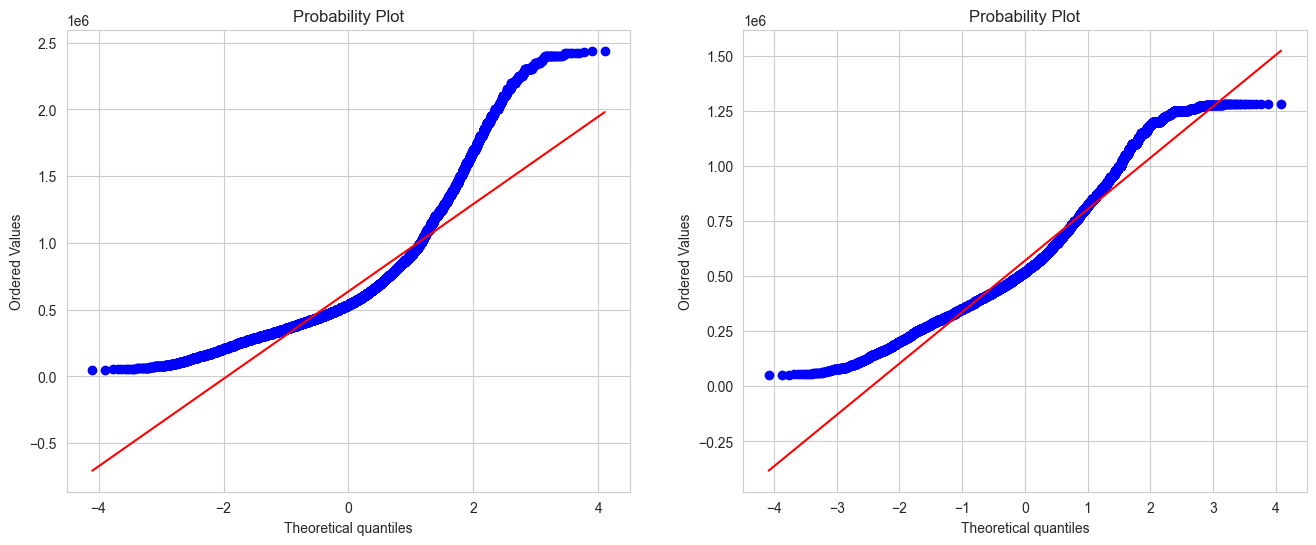

In [33]:
#Probability plots before and after handling outliers
# A probability plot (probplot)—typically used in normality testing, is also a helpful visual tool for identifying outliers 
# and assessing distribution fit. 

# Points far from the line	        Possible outliers
# Points far at the ends only	    Outliers in tails
# Sudden jumps in spacing	        Data irregularities or outliers
# S-shape curve	                    Non-normality + possible outliers

sns.set_style('whitegrid')
plt.figure(figsize=(16,6))

plt.subplot(1, 2, 1)
stats.probplot(df[feature], plot=plt)

plt.subplot(1, 2, 2)
stats.probplot(df_cleaned[feature], plot=plt)

In [34]:
def find_outliers_ZScore_method(input_df, variable):
    df_z_scores = input_df.copy()

    # Calculate Z-scores for the specified variable droping any rows having NaN values
    z_scores = np.abs(stats.zscore(input_df[variable].dropna())) 

    # Add Z-scores as a new column
    df_z_scores[variable + '_Z'] = z_scores  
    return df_z_scores

In [35]:
# Calculate Z-scores for the specified feature
df_z_scores = find_outliers_ZScore_method(df.copy(), feature)
df_z_scores.head()

,ADDRESS,SUBURB,PRICE,BEDROOMS,BATHROOMS,GARAGE,LAND_AREA,FLOOR_AREA,BUILD_YEAR,CBD_DIST,NEAREST_STN,NEAREST_STN_DIST,DATE_SOLD,POSTCODE,LATITUDE,LONGITUDE,NEAREST_SCH,NEAREST_SCH_DIST,NEAREST_SCH_RANK,PRICE_Z
0,1 Acorn Place,South Lake,565000,4,2,2.0,600,160,2003.0,18300,Cockburn Central Station,1800,09-2018\r,6164,-32.115900,115.842450,LAKELAND SENIOR HIGH SCHOOL,0.828339,NaN,0.202552
1,1 Addis Way,Wandi,365000,3,2,2.0,351,139,2013.0,26900,Kwinana Station,4900,02-2019\r,6167,-32.193470,115.859554,ATWELL COLLEGE,5.524324,129.0,0.764633
2,1 Ainsley Court,Camillo,287000,3,1,1.0,719,86,1979.0,22600,Challis Station,1900,06-2015\r,6111,-32.120578,115.993579,KELMSCOTT SENIOR HIGH SCHOOL,1.649178,113.0,0.983845
3,1 Albert Street,Bellevue,255000,2,1,2.0,651,59,1953.0,17900,Midland Station,3600,07-2018\r,6056,-31.900547,116.038009,SWAN VIEW SENIOR HIGH SCHOOL,1.571401,NaN,1.073778
4,1 Aman Place,Lockridge,325000,4,1,2.0,466,131,1998.0,11200,Bassendean Station,2000,11-2016\r,6054,-31.885790,115.947780,KIARA COLLEGE,1.514922,NaN,0.877049


In [36]:
#Remove outliers w.r.t the Feature. Remove data points where |Z| > 3.

df_z_score_cleaned = df_z_scores[df_z_scores[feature+'_Z'] < 3]

print(f'Cleaned dataset : {df_z_score_cleaned.shape}')
print(f'Outliers count : {len(df_z_scores)-len(df_z_score_cleaned)}')

Cleaned dataset : (32946, 20)
Outliers count : 710


((array([-4.0957668 , -3.88546145, -3.77062315, ...,  3.77062315,
          3.88546145,  4.0957668 ]),
  array([  51000,   52000,   53000, ..., 1700000, 1700000, 1701000])),
 (np.float64(282229.99256573955),
  np.float64(607863.4332240636),
  np.float64(0.9510404869605033)))

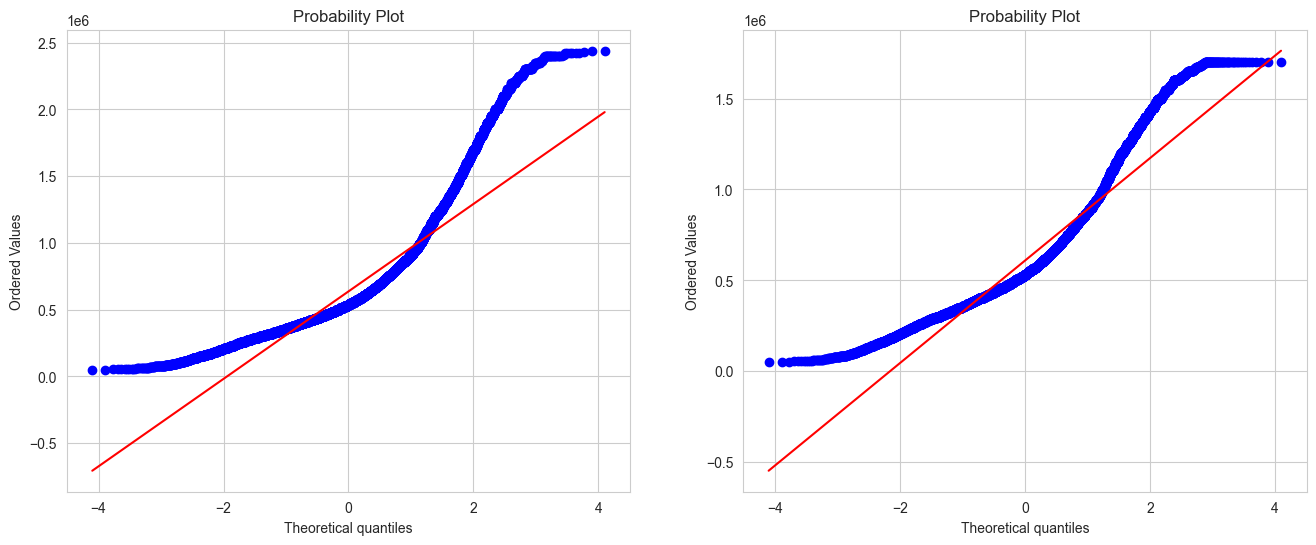

In [37]:
sns.set_style('whitegrid')
plt.figure(figsize=(16,6))

plt.subplot(1, 2, 1)
stats.probplot(df_z_scores[feature], plot=plt)

plt.subplot(1, 2, 2)
stats.probplot(df_z_score_cleaned[feature], plot=plt)

## Pandas Profile Report

In [ ]:
from ydata_profiling import ProfileReport

In [ ]:
profile = ProfileReport(df, title="Profiling Report")

profile.to_file("ProfilingReport.html")

profile.to_file("ProfilingReport.json")